In [1]:
import pandas as pd
from trading_bot import TradingBot

# importing matplotlib module 
from matplotlib import pyplot as plt

In [85]:
#https://medium.com/codex/how-to-calculate-bollinger-bands-of-a-stock-with-python-f9f7d1184fc3

In [2]:
%load_ext autoreload
%autoreload 2

In [72]:
bot = TradingBot()
msft_data = bot.get_stock_data('MSFT', data_period='5y')
msft_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-06-02,65.977889,67.307935,65.790554,67.214272,34770300,0.0,0
2017-06-05,67.410972,68.272691,67.261104,67.701332,33316800,0.0,0
2017-06-06,67.720074,68.019803,67.691969,67.926132,31511100,0.0,0
2017-06-07,68.038531,68.160293,67.392237,67.804367,22301800,0.0,0
2017-06-08,67.916781,67.926143,66.970759,67.392250,24588300,0.0,0


In [73]:
# from yfinance import Ticker
# stock = Ticker('MSFT')
# reccomendations_df = pd.DataFrame(stock.recommendations)
# reccomendations_df.head()

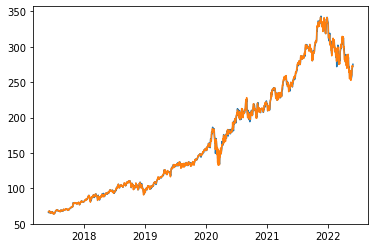

In [74]:
plt.plot(msft_data['Open'])
plt.plot(msft_data['Close'])

In [75]:
msft_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-06-02,65.977889,67.307935,65.790554,67.214272,34770300,0.0,0
2017-06-05,67.410972,68.272691,67.261104,67.701332,33316800,0.0,0
2017-06-06,67.720074,68.019803,67.691969,67.926132,31511100,0.0,0
2017-06-07,68.038531,68.160293,67.392237,67.804367,22301800,0.0,0
2017-06-08,67.916781,67.926143,66.970759,67.392250,24588300,0.0,0


In [76]:
type(msft_data['Close'])

pandas.core.series.Series

In [82]:
price_hist = msft_data.loc[:,'Close']
price_hist = pd.DataFrame(price_hist)
price_hist['SMA_50'] = price_hist.Close.rolling(50).mean()
price_hist['SMA_200'] = price_hist.Close.rolling(200).mean()  
short_ma = price_hist.iloc[-1].loc['SMA_50']
long_ma = price_hist.iloc[-1].loc['SMA_200']    

In [83]:

price_hist

,Close,SMA_50,SMA_200
Date,,,
2017-06-02,67.214272,NaN,NaN
2017-06-05,67.701332,NaN,NaN
2017-06-06,67.926132,NaN,NaN
2017-06-07,67.804367,NaN,NaN
2017-06-08,67.392250,NaN,NaN
...,...,...,...
2022-05-25,262.519989,283.717449,302.015759
2022-05-26,265.899994,283.161331,301.922129
2022-05-27,273.239990,282.735450,301.851015


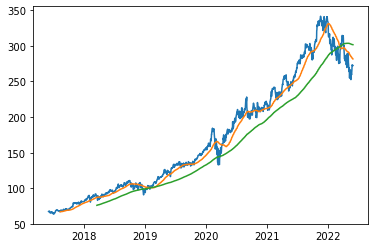

In [84]:
plt.plot(price_hist['Close'])
plt.plot(price_hist['SMA_50'])
plt.plot(price_hist['SMA_200'])

In [42]:
#price_hist.index[0] + pd.Timedelta(days=1)

Timestamp('2019-06-04 00:00:00')

In [98]:
# diff_hist has rows where sma_50 < sma_200
price_hist = price_hist.reset_index(level=0)
diff_hist = price_hist[price_hist['SMA_50'] < price_hist['SMA_200']]

In [124]:
diff_hist

,index,Date,Close,SMA_50,SMA_200
426,426,2019-02-12,102.909012,100.824645,100.831177
427,427,2019-02-13,102.831985,100.759563,100.889799
428,428,2019-02-14,102.918648,100.682735,100.959790
429,429,2019-02-15,104.189484,100.608218,101.029098
430,430,2019-02-19,104.141350,100.601478,101.105249
...,...,...,...,...,...
1254,1254,2022-05-25,262.519989,283.717449,302.015759
1255,1255,2022-05-26,265.899994,283.161331,301.922129
1256,1256,2022-05-27,273.239990,282.735450,301.851015
1257,1257,2022-05-31,271.869995,282.178213,301.757975


### First intersection going down (SMA_50 < SMA_200)
#### This means SELL

In [102]:
# we already have the rows where the faster sma is lower than the faster sma
# we now want to get the first non-consecutive occurence of the intersect
# in other words we don't want the whole time period where one sma < other sma, we only want the first days to know when it started
diff_group = (diff_hist['index'] != diff_hist.shift()['index']+1).cumsum().rename('group')
diff_group

426     1
427     1
428     1
429     1
430     1
       ..
1254    2
1255    2
1256    2
1257    2
1258    2
Name: group, Length: 70, dtype: int64

In [121]:
diff_hist.groupby([diff_group], as_index=False).first()

,index,Date,Close,SMA_50,SMA_200
0,426,2019-02-12,102.909012,100.824645,100.831177
1,1205,2022-03-16,293.705933,298.202045,298.887038


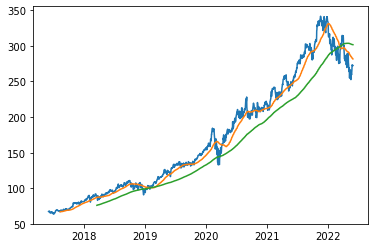

In [127]:
plt.plot(price_hist['Date'], price_hist['Close'])
plt.plot(price_hist['Date'], price_hist['SMA_50'])
plt.plot(price_hist['Date'], price_hist['SMA_200'])

### Correctly shows the downward interections in 2019 and right now.